# Table of Contents

- [Libraries](#Libraries)
- [Data](#Data)
- [Modeling](#Modeling)
    - [K-Means](#K-Means)

# Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, k_means
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_selection import SelectKBest
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
pitch_data = pd.read_csv('../datasets/mlb_pitch_stats_19_20_21.csv')
pitch_data.drop(columns = ['Unnamed: 0',' first_name', 'last_name'], axis = 1, inplace = True)
print(pitch_data.shape)
pitch_data.head()

(1072, 87)


,player_id,year,age,ip,bf,ab,h,k%,bb%,ba,...,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops
0,425794,2021,40,196.1,784,725,157,21.6,5.9,0.217,...,22.3,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6,0.681
1,425844,2021,38,164.2,670,626,157,17.0,5.2,0.251,...,15.6,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725
2,429722,2021,39,61.1,255,232,58,18.8,7.5,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851
3,433589,2021,37,72.1,290,273,63,12.4,4.1,0.231,...,10.7,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3,0.722
4,445276,2021,34,61.2,250,210,33,29.6,13.6,0.157,...,0.0,0.0,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9,0.570


# Modeling

### K-Means

In [3]:
ss = StandardScaler()
X_scaled = ss.fit_transform(pitch_data)

In [4]:
km = KMeans(n_clusters = 5,
            init = 'random',
            random_state = 42)

km.fit(X_scaled)
label = km.fit_predict(X_scaled)

print(label)

[2 2 3 ... 3 4 3]


In [5]:
pitch_data['label'] = label
pitch_data.head()

,player_id,year,age,ip,bf,ab,h,k%,bb%,ba,...,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops,label
0,425794,2021,40,196.1,784,725,157,21.6,5.9,0.217,...,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6,0.681,2
1,425844,2021,38,164.2,670,626,157,17.0,5.2,0.251,...,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725,2
2,429722,2021,39,61.1,255,232,58,18.8,7.5,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851,3
3,433589,2021,37,72.1,290,273,63,12.4,4.1,0.231,...,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3,0.722,1
4,445276,2021,34,61.2,250,210,33,29.6,13.6,0.157,...,0.0,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9,0.570,0


In [6]:
centroids = km.cluster_centers_

print('Number of Centroids:', len(centroids))
print("Predicted clusters to points: ", label[:10], '\n')
print("Location of centroids: ")
print(centroids)

Number of Centroids: 5
Predicted clusters to points:  [2 2 3 1 0 1 1 2 3 0] 

Location of centroids: 
[[ 2.04952375e-02  6.25454580e-02  1.52487049e-01 -4.97566677e-01
  -5.20357491e-01 -5.25563971e-01 -6.13553357e-01  7.41570958e-01
   3.51674227e-01 -7.00494831e-01 -7.10523537e-01 -3.98048057e-01
  -6.58107314e-01 -6.44671036e-01 -5.30134120e-01 -5.33869795e-01
  -2.82303327e-01 -8.25844444e-01 -7.91759374e-01 -6.25348047e-01
  -7.01836271e-01 -4.38013358e-01 -3.78477828e-01 -4.79986834e-01
  -3.12165596e-01 -4.50300902e-01 -1.12234699e-01  8.22052689e-03
  -2.98890356e-01 -3.45040159e-01 -2.48482569e-03 -6.61257486e-02
  -2.03095342e-01 -7.50098669e-02  5.74327068e-01  2.32706170e-01
   7.48785971e-01 -7.39988160e-01  1.01426564e-01 -5.04824563e-01
  -5.73008256e-01 -1.01426564e-01 -5.05731306e-01  7.97677113e-01
   5.75594940e-02  3.36022633e-02 -6.84807506e-02 -1.05157430e-01
   1.84839335e-01  8.24368800e-02 -5.06645311e-01  5.57169054e-02
  -1.46919384e-02 -2.11095410e-03 -4.921

In [7]:
len(km.labels_)

print('label:', km.labels_)
print('Number of iterations:', km.n_iter_)
print('Number of features:', km.n_features_in_)
print('Number of clusters:', km.n_clusters)
print('Inertia:', km.inertia_)
print('Silhouette Score:', silhouette_score(X_scaled, label))

label: [2 2 3 ... 3 4 3]
Number of iterations: 38
Number of features: 87
Number of clusters: 5
Inertia: 69716.08198613291
Silhouette Score: 0.09209660250511442


In [8]:
score = silhouette_score(pitch_data, label)
print('Silhouette Score:', score)

Silhouette Score: -0.07234052206073704


In [9]:
pitch_data.groupby(by = 'label').mean().T

label,0,1,2,3,4
player_id,586710.404908,573268.156863,572566.300000,594913.166667,593216.865979
year,2020.024540,2019.985294,2019.877778,2019.978632,2019.993127
age,29.570552,29.656863,29.238889,28.393162,28.611684
ip,49.611043,63.908333,156.768333,57.068803,53.352921
bf,208.319018,275.029412,656.638889,256.076923,220.766323
...,...,...,...,...,...
cu_hb,0.460123,0.956373,0.437778,0.202991,0.146735
cu_vb,-6.096933,-22.084314,-10.790556,-4.047436,-3.929553
cu_brk,2.153988,7.378922,3.607222,1.638034,1.247079
cu_velo_range,0.324540,1.204412,0.589444,0.220513,0.219588


In [10]:
filtered_label0 = pitch_data.iloc[label == 0]
filtered_label1 = pitch_data.iloc[label == 1]
filtered_label2 = pitch_data.iloc[label == 2]
filtered_label3 = pitch_data.iloc[label == 3]
filtered_label4 = pitch_data.iloc[label == 4]

In [11]:
centroids_x = centroids[0:,:1]
centroids_y = km.cluster_centers_[:,1:2]

print('x:', centroids_x)
print('\n')
print('y:', centroids_y)

x: [[ 0.02049524]
 [-0.17968913]
 [-0.19014131]
 [ 0.14265224]
 [ 0.11739062]]


y: [[ 0.06254546]
 [ 0.01409147]
 [-0.11865141]
 [ 0.00586681]
 [ 0.02376237]]


In [12]:
cluster = pitch_data[['la_avg', 'cb_spinrate']]

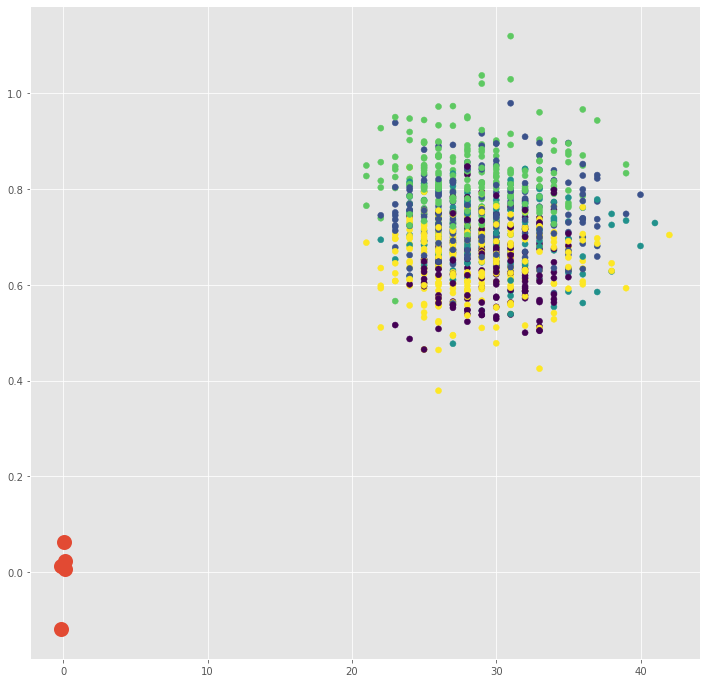

In [13]:
plt.figure(figsize=(12,12))

plt.scatter(x = pitch_data['age'], y = pitch_data['xops'], 
            c = km.labels_);
plt.scatter(centroids_x, centroids_y, 
            marker = 'o', s=100, 
            linewidths = 5);

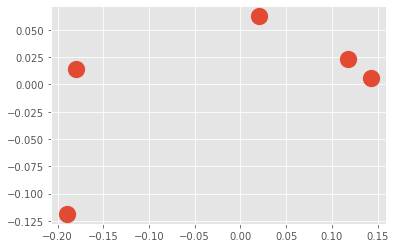

In [14]:
plt.scatter(centroids_x, centroids_y, 
            marker='o', s=150, 
            linewidths = 5);

In [15]:
print(len(centroids_x))
print(len(centroids_y))

5
5


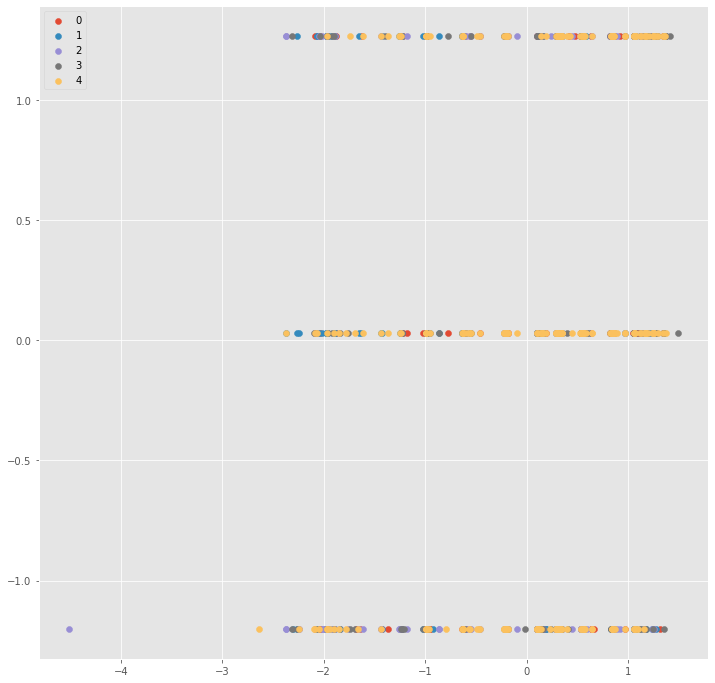

In [16]:
u_labels = np.unique(label)
plt.figure(figsize = (12, 12))

for i in u_labels:
    plt.scatter(X_scaled[label == i , 0], X_scaled[label == i , 1], label = i);
    plt.legend();
plt.show();